In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [31]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [32]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.936202,0.169729,0.133473,-0.971717,1.622450,0
1,-1.901441,-1.264125,-2.806539,-1.374938,-2.504842,1
2,0.949500,-0.657348,-3.287742,0.511264,0.836517,0
3,1.494328,0.164723,-1.836496,-0.238243,0.661473,0
4,1.523565,2.262171,-0.766239,-2.199658,0.098778,0


In [33]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [34]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [35]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [45]:
df1 = sample_rows(df,0.2)

In [46]:
df2 = sample_rows(df,0.2)

In [47]:
df3 = sample_rows(df,0.2)

In [48]:
df1.shape

(20, 6)

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()
     

clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])
     

DecisionTreeClassifier()

[Text(0.5, 0.875, 'X[1] <= 0.059\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.25, 0.625, 'X[3] <= -0.02\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.625, 'X[1] <= 1.422\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.625, 0.375, 'X[2] <= -0.621\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

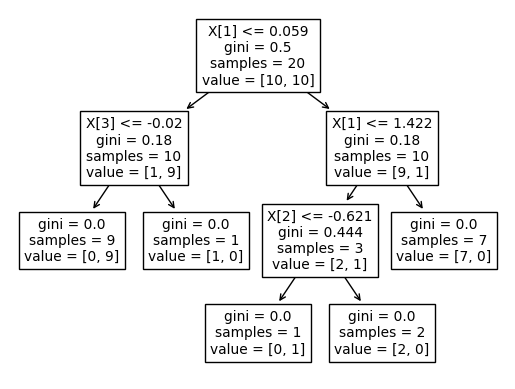

In [50]:
from sklearn.tree import plot_tree
     

plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'X[0] <= 0.259\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.6, 0.5, 'X[1] <= -2.245\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

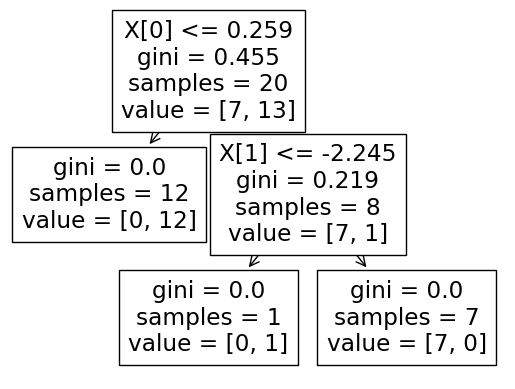

In [51]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'X[0] <= 0.094\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6, 0.5, 'X[2] <= 0.549\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

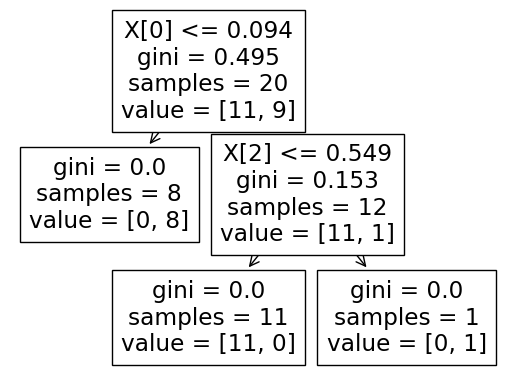

In [52]:
plot_tree(clf3)

In [58]:
clf1.predict(np.array([1.936202, 0.169729, 0.133473, -0.971717]).reshape(1,4))

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [59]:
clf2.predict(np.array([1.936202, 0.169729, 0.133473, -0.971717]).reshape(1,4))

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [60]:
clf3.predict(np.array([1.936202, 0.169729, 0.133473, -0.971717]).reshape(1,4))

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [57]:
df.sample(14,replace=True)
     

,col1,col2,col3,col4,col5,target
80,1.750112,-0.213641,0.633244,-0.230378,0.728203,1
25,-3.140054,-1.313238,-0.161480,-0.651615,-1.088710,1
76,-2.345987,-1.152394,1.858542,0.164880,-0.483590,1
55,-0.119263,0.974812,-0.937954,-1.607565,-1.149526,1
35,-0.190118,1.985374,-1.291142,-1.439777,-0.412660,0
15,-0.202881,0.746423,-1.266413,-1.487637,-1.039405,1
14,1.092905,-0.884290,-0.674426,0.330316,1.190888,0
11,0.119843,-0.318025,-0.830507,-1.282737,-0.433015,1
56,-1.931421,-0.150254,-0.372738,-0.759758,-1.224556,1
64,0.191300,1.607781,-1.725102,-1.756091,1.240771,0
